In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from skimage.io import imread,imshow,imsave

In [73]:
import warnings
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [4]:
path_img = Path('sort_trn_imgs_per_label')

In [5]:
df = pd.read_csv('train.csv')

In [6]:
trn_imgs = Path('train_images')

In [7]:
lbl_dir = Path('train_labels')

In [70]:
def plt_img(img_arr,size=(40,4)):
    fig = plt.figure(figsize=size)
    plt.imshow(img_arr)

In [180]:
def annotate_img(img,lbl):
    for i in [1,2,3,4]:
        lbl_ = (lbl == i)
        lbl_int = lbl_.astype(np.uint8)
        kernel = np.ones((5,5),np.uint8)
        erosion = cv.erode(lbl_int,kernel,iterations = 1)
        dilate = cv.dilate(lbl_int,kernel,iterations = 1)
        lbl_int = (dilate-lbl_int)
        def highlight(msk,img,class_):
            msk = msk.astype(bool)
            img[:,:,0][msk] = 0
            img[:,:,1][msk] = 0
            img[:,:,2][msk] = 0
            if class_ < 4:
                img[:,:,(class_-1)][msk] = 255
        highlight(lbl_int,img,i)
    return img

# edit masks

In [181]:
imgs = [img for img in trn_imgs.iterdir() if img.is_file()]

In [275]:
p = 33
pic = imread(imgs[p])
lbl = imread(lbl_dir/(imgs[p].stem+'.png'))

In [276]:
equ = cv.equalizeHist(pic[:,:,0]) 

In [280]:
imgs[0]

PosixPath('train_images/1e0220d5c.jpg')

In [282]:
cv.imread('train_images/1e0220d5c.jpg')

array([[[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 70,  70,  70]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       ...,

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [136, 136, 136],
        [135, 135, 135],
        [134, 134, 134]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [137, 137, 137],
        [136, 136, 136],
        [136, 136, 136]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [136, 136, 136]]

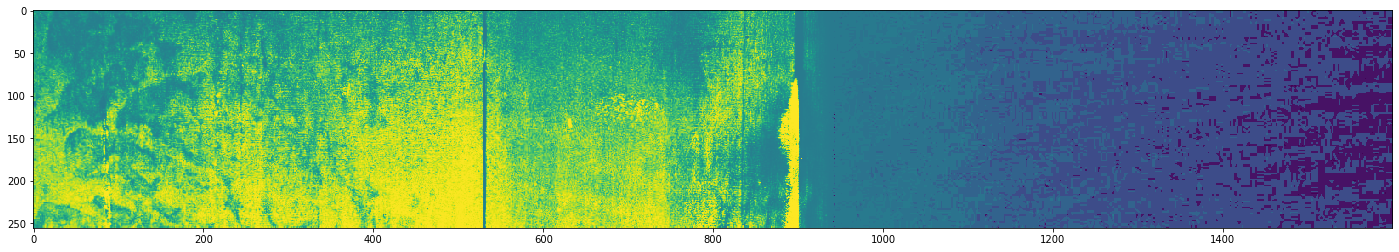

In [277]:
plt_img(equ)

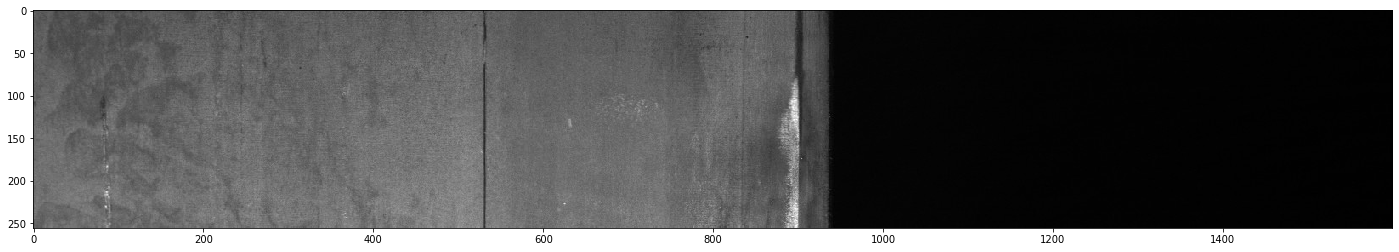

In [263]:
plt_img(pic)

In [264]:
_ = annotate_img(pic,lbl)

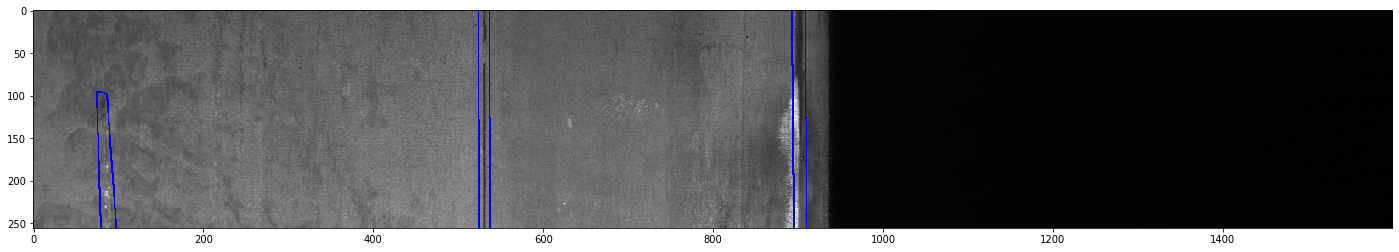

In [265]:
plt_img(_)

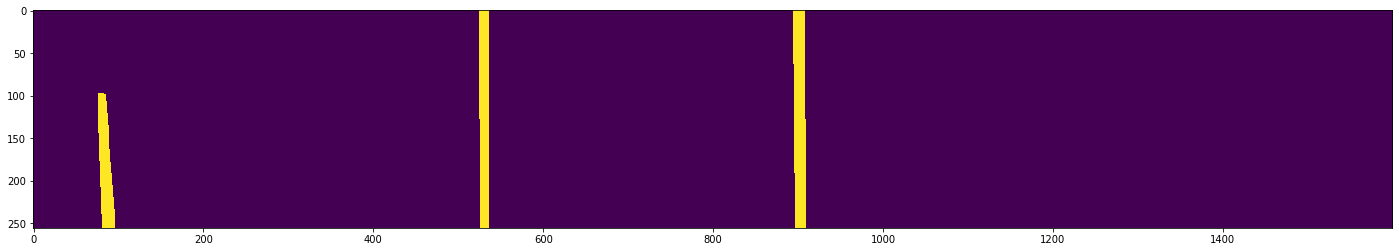

In [266]:
plt_img(lbl)

In [198]:
lbl = lbl/3

In [62]:
np.unique(lbl)

Array([0., 1.])

In [64]:
kernel = np.ones((7,7),np.uint8)
erosion = cv.erode(lbl,kernel,iterations = 1)
dilate = cv.dilate(lbl,kernel,iterations = 1)

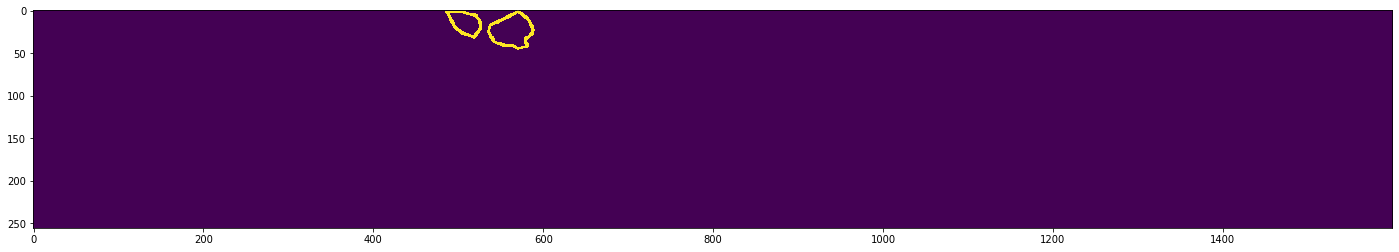

In [65]:
fig = plt.figure(figsize=(40,4))
plt.imshow(lbl-erosion)

In [67]:
lbl_ = lbl-erosion
lbl_ = lbl_.astype(bool)

In [79]:
pic[:,:,0][lbl_] = 0
pic[:,:,1][lbl_] = 0
pic[:,:,2][lbl_] = 0

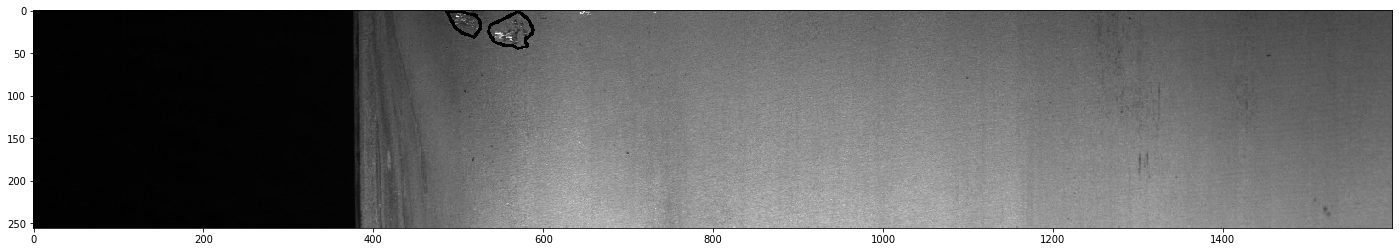

In [80]:
fig = plt.figure(figsize=(40,4))
plt.imshow(pic)

# save files

In [10]:
imgs = [fl for fl in trn_imgs.iterdir() if fl.is_file()]

In [16]:
_ = imgs[1];
_

PosixPath('train_images/692c9f467.jpg')

In [19]:
_.name+'_'+str(1)

'692c9f467.jpg_1'

In [14]:
df.columns

Index(['ImageId_ClassId', 'EncodedPixels'], dtype='object')

In [23]:
df[df.ImageId_ClassId == (_.name+'_'+str(1))]['EncodedPixels'].values[0]

nan

In [24]:
warnings.filterwarnings("ignore")

In [31]:
for img in imgs:
    for i in [1,2,3,4]:
        im = imread(img)
        if df[df.ImageId_ClassId == (_.name+'_'+str(1))]['EncodedPixels'].values[0]:
            imsave(path_img/str(i)/(img.stem+'.png'),im)

ValueError: Could not find a format to read the specified file in mode 'i'